<a href="https://colab.research.google.com/github/brasilemnumeros/dados/blob/main/mvgr/MVG-R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MVG-R Nominal (R$)
Analise e visualize o indicador MVG-R (código 25419) utilizando o pacote `python-bcb`.

## Coleta de dados

### Subtask:
Buscar uma fonte confiável de dados históricos.


In [4]:
from bcb import sgs
import pandas as pd
from datetime import datetime, timedelta

# Define the series code for the MVG-R
mvg_r_code = 25419

# Define the end date as today
end_date = datetime.now()

# Define the start date for the historical period (e.g., from 2002-01-01 for MVG-R)
# The MVG-R series typically starts later than the PIB series, so adjusting the start date is appropriate.
start_date_overall = datetime(2002, 1, 1)

# List to store dataframes for each collection period
dfs_mvg_r = []

# Define the period length in years for chunking data collection
period_years_mvg_r = 10

# Loop through periods backwards from the end date
current_end_date_mvg_r = end_date
while current_end_date_mvg_r > start_date_overall:
    # Determine the start date for the current period, ensuring it's not before start_date_overall
    current_start_date_mvg_r = max(start_date_overall, current_end_date_mvg_r - timedelta(days=period_years_mvg_r * 365))

    print(f"Attempting to retrieve MVG-R data from {current_start_date_mvg_r.strftime('%Y-%m-%d')} to {current_end_date_mvg_r.strftime('%Y-%m-%d')}")

    try:
        # Use the bcb.sgs.get() function to retrieve the series data for the current period
        # Pass the series code as a list of tuples to specify the column name
        df_period_mvg_r = sgs.get([('mvg_r', mvg_r_code)], start=current_start_date_mvg_r.strftime('%Y-%m-%d'), end=current_end_date_mvg_r.strftime('%Y-%m-%d'))

        if not df_period_mvg_r.empty:
            print(f"MVG-R data retrieved for the period: {current_start_date_mvg_r.strftime('%Y-%m-%d')} to {current_end_date_mvg_r.strftime('%Y-%m-%d')}")
            dfs_mvg_r.append(df_period_mvg_r)
        else:
            print(f"No MVG-R data retrieved for the period: {current_start_date_mvg_r.strftime('%Y-%m-%d')} to {current_end_date_mvg_r.strftime('%Y-%m-%d')}")

    except Exception as e:
        print(f"An error occurred while retrieving MVG-R data for the period {current_start_date_mvg_r.strftime('%Y-%m-%d')} to {current_end_date_mvg_r.strftime('%Y-%m-%d')}: {e}")

    # Set the end date for the next period as the day before the current period's start date
    current_end_date_mvg_r = current_start_date_mvg_r - timedelta(days=1)

print(f"Collected {len(dfs_mvg_r)} dataframes for different MVG-R periods.")

# Combine all dataframes in the list if the list is not empty
if dfs_mvg_r:
    # Concatenate the dataframes and sort the index (dates) to ensure chronological order
    df_mvg_r = pd.concat(dfs_mvg_r).sort_index()
    print("\nMVG-R DataFrames combined successfully!")

    print("\nPrimeiras 5 linhas do DataFrame df_mvg_r:")
    display(df_mvg_r.head())

    print("\nÚltimas 5 linhas do DataFrame df_mvg_r:")
    display(df_mvg_r.tail())

    print("\nInformações do DataFrame df_mvg_r:")
    df_mvg_r.info()

else:
    print("The list of MVG-R DataFrames is empty. No data to combine.")
    df_mvg_r = None

# Rename the DataFrame to df for consistency with the rest of the notebook
df = df_mvg_r

Attempting to retrieve MVG-R data from 2015-10-16 to 2025-10-13
MVG-R data retrieved for the period: 2015-10-16 to 2025-10-13
Attempting to retrieve MVG-R data from 2005-10-17 to 2015-10-15
MVG-R data retrieved for the period: 2005-10-17 to 2015-10-15
Attempting to retrieve MVG-R data from 2002-01-01 to 2005-10-16
MVG-R data retrieved for the period: 2002-01-01 to 2005-10-16
Collected 3 dataframes for different MVG-R periods.

MVG-R DataFrames combined successfully!

Primeiras 5 linhas do DataFrame df_mvg_r:


,mvg_r
Date,
2004-03-01,44797
2004-04-01,43000
2004-05-01,43638
2004-06-01,43975
2004-07-01,43465



Últimas 5 linhas do DataFrame df_mvg_r:


,mvg_r
Date,
2025-03-01,261000
2025-04-01,264000
2025-05-01,260000
2025-06-01,258000
2025-07-01,252000



Informações do DataFrame df_mvg_r:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 259 entries, 2004-03-01 to 2025-07-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   mvg_r   259 non-null    int64
dtypes: int64(1)
memory usage: 4.0 KB


## Análise exploratória

### Subtask:
Realizar uma análise inicial dos dados para entender sua estrutura e características.


In [5]:
# Display the first 5 rows of the DataFrame
print("Primeiras 5 linhas do DataFrame df:")
display(df.head())

# Display the last 5 rows of the DataFrame
print("\nÚltimas 5 linhas do DataFrame df:")
display(df.tail())

# Get information about the DataFrame (data types, non-null counts)
print("\nInformações do DataFrame df:")
df.info()

# Generate descriptive statistics for the 'mvg_r' column
print("\nEstatísticas Descritivas do MVG-R:")
print(df['mvg_r'].describe())

# Check the date range of the data
min_date = df.index.min()
max_date = df.index.max()
print(f"\nPeríodo dos dados do MVG-R: {min_date.strftime('%Y-%m-%d')} a {max_date.strftime('%Y-%m-%d')}")

Primeiras 5 linhas do DataFrame df:


,mvg_r
Date,
2004-03-01,44797
2004-04-01,43000
2004-05-01,43638
2004-06-01,43975
2004-07-01,43465



Últimas 5 linhas do DataFrame df:


,mvg_r
Date,
2025-03-01,261000
2025-04-01,264000
2025-05-01,260000
2025-06-01,258000
2025-07-01,252000



Informações do DataFrame df:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 259 entries, 2004-03-01 to 2025-07-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   mvg_r   259 non-null    int64
dtypes: int64(1)
memory usage: 4.0 KB

Estatísticas Descritivas do MVG-R:
count       259.000000
mean     140704.806950
std       66513.861626
min       42000.000000
25%       80000.000000
50%      145000.000000
75%      180000.000000
max      264000.000000
Name: mvg_r, dtype: float64

Período dos dados do MVG-R: 2004-03-01 a 2025-07-01


## Visualização do MVG-R

### Subtask:
Criar um gráfico para visualizar a evolução histórica do indicador MVG-R ao longo do tempo.

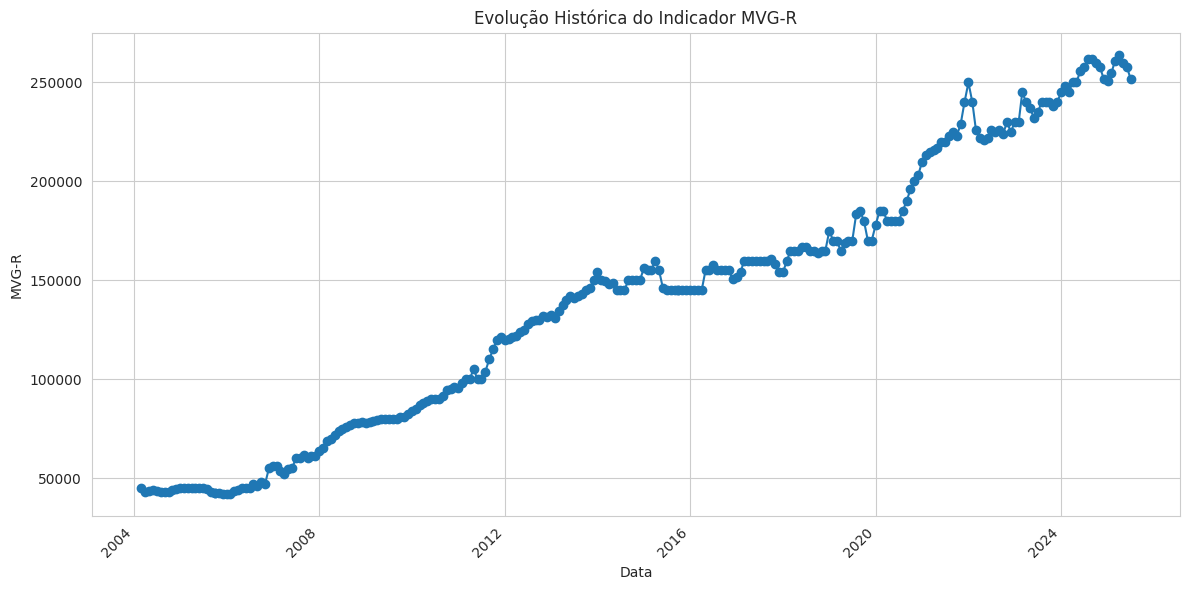

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plots
sns.set_style("whitegrid")

# Create a figure and an axes for the plot
plt.figure(figsize=(12, 6))
ax = plt.gca() # Get current axes

# Plot the time series of the MVG-R
df['mvg_r'].plot(ax=ax, marker='o', linestyle='-')

# Add titles and labels
plt.title('Evolução Histórica do Indicador MVG-R')
plt.xlabel('Data')
plt.ylabel('MVG-R')

# Improve date formatting on the x-axis
plt.xticks(rotation=45)
plt.tight_layout() # Adjust layout to prevent labels overlapping

# Display the plot
plt.show()

## Salvar dados do MVG-R em json

### Subtask:
Gerar um arquivo JSON com os dados consolidados do indicador MVG-R.

In [8]:
import json

# Create an empty list to store the data points for the JSON output
data_list_mvg_r = []

# Iterate through the df DataFrame (which now contains MVG-R data)
for index, row in df.iterrows():
    # Append a dictionary to data_list_mvg_r with 'date' and 'value'
    data_list_mvg_r.append({
        "date": index.strftime('%Y-%m-%d'),  # Format date as YYYY-MM-DD
        "rate": int(row['mvg_r'])  # Convert int64 to standard Python int
    })

# Create the main dictionary structure for the JSON output
json_output_mvg_r = {
    "indicatorName": "MVG-R (código 25419)",  # Set the indicator name
    "data": data_list_mvg_r  # Include the list of data points
}

# Define the output file path
output_file_path = 'mvgr-nominal.json'

# Save the dictionary to a JSON file with indentation for readability
with open(output_file_path, 'w') as f:
    json.dump(json_output_mvg_r, f, indent=4)

print(f"Dados do MVG-R formatados e salvos em '{output_file_path}'")

Dados do MVG-R formatados e salvos em 'mvg-r.json'


# MVG-R Real (R$)

# Task
Calcule o MVG-R Real (descontado da inflação) utilizando o IPCA como inflação a ser descontada. Apresente o resultado em um gráfico e salve os dados em um arquivo JSON.

## Coleta de dados do ipca

### Subtask:
Obter os dados históricos do IPCA utilizando o pacote `python-bcb`. O código para o IPCA geral é 433.


**Reasoning**:
Obtain the historical IPCA data using the `python-bcb` package as instructed in the subtask.



In [9]:
# Define the series code for the IPCA
ipca_code = 433

# Define the start date for the IPCA data collection.
# Ensure it is at least as early as the start date of the MVG-R data.
start_date_ipca = datetime(2004, 3, 1)

# Define the end date as today (already defined as end_date in the previous cell)

print(f"Attempting to retrieve IPCA data from {start_date_ipca.strftime('%Y-%m-%d')} to {end_date.strftime('%Y-%m-%d')}")

try:
    # Use the bcb.sgs.get() function to retrieve the series data
    df_ipca = sgs.get([('ipca', ipca_code)], start=start_date_ipca.strftime('%Y-%m-%d'), end=end_date.strftime('%Y-%m-%d'))

    if not df_ipca.empty:
        print("IPCA data retrieved successfully!")

        print("\nPrimeiras 5 linhas do DataFrame df_ipca:")
        display(df_ipca.head())

        print("\nÚltimas 5 linhas do DataFrame df_ipca:")
        display(df_ipca.tail())

        print("\nInformações do DataFrame df_ipca:")
        df_ipca.info()

    else:
        print("No IPCA data retrieved.")
        df_ipca = None

except Exception as e:
    print(f"An error occurred while retrieving IPCA data: {e}")
    df_ipca = None

Attempting to retrieve IPCA data from 2004-03-01 to 2025-10-13
IPCA data retrieved successfully!

Primeiras 5 linhas do DataFrame df_ipca:


,ipca
Date,
2004-03-01,0.47
2004-04-01,0.37
2004-05-01,0.51
2004-06-01,0.71
2004-07-01,0.91



Últimas 5 linhas do DataFrame df_ipca:


,ipca
Date,
2025-05-01,0.26
2025-06-01,0.24
2025-07-01,0.26
2025-08-01,-0.11
2025-09-01,0.48



Informações do DataFrame df_ipca:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 259 entries, 2004-03-01 to 2025-09-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ipca    259 non-null    float64
dtypes: float64(1)
memory usage: 4.0 KB


## Combinar os dados

### Subtask:
Combinar os dataframes do MVG-R (`df`) e do IPCA (`df_ipca`) com base na data.


**Reasoning**:
Combine the MVG-R and IPCA dataframes based on their date index and display the resulting dataframe's head and info to verify the merge.



In [10]:
# Combine the df and df_ipca DataFrames based on their index (Date)
# Using an outer join to keep all dates present in both DataFrames
df_combined = pd.merge(df, df_ipca, left_index=True, right_index=True, how='outer')

# Display the first few rows of the combined DataFrame
print("Primeiras 5 linhas do DataFrame combinado:")
display(df_combined.head())

# Get information about the combined DataFrame
print("\nInformações do DataFrame combinado:")
df_combined.info()

Primeiras 5 linhas do DataFrame combinado:


,mvg_r,ipca
Date,,
2004-03-01,44797.0,0.47
2004-04-01,43000.0,0.37
2004-05-01,43638.0,0.51
2004-06-01,43975.0,0.71
2004-07-01,43465.0,0.91



Informações do DataFrame combinado:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 261 entries, 2004-03-01 to 2025-09-01
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mvg_r   259 non-null    float64
 1   ipca    261 non-null    float64
dtypes: float64(2)
memory usage: 6.1 KB


## Calcular o mvg-r real

### Subtask:
Descontar a inflação do MVG-R nominal utilizando os dados do IPCA.


**Reasoning**:
Calculate the cumulative inflation index and the real MVG-R value, then store it in the dataframe and display the head.



In [11]:
# Calculate the cumulative inflation index
# Handle potential missing values by filling with 0 before calculating the factor
df_combined['ipca_factor'] = (df_combined['ipca'].fillna(0) / 100) + 1

# Calculate the cumulative product, handling potential NaNs by filling with 1 before cumprod
# This assumes the first valid IPCA value should be the base for subsequent calculations.
# A more robust approach might be to forward-fill NaNs before calculating the factor.
# Let's refine this: forward-fill NaNs in IPCA *before* calculating the factor.
df_combined['ipca_filled'] = df_combined['ipca'].fillna(method='ffill')
df_combined['ipca_factor'] = (df_combined['ipca_filled'] / 100) + 1

# Calculate the cumulative inflation index. Set the initial value to 1.
df_combined['cumulative_inflation_index'] = df_combined['ipca_factor'].cumprod()

# Choose the first available date as the base period for the real value calculation.
# Find the cumulative inflation index value at the first date with a non-null MVG-R value.
first_valid_mvg_r_date = df_combined['mvg_r'].first_valid_index()
base_inflation_index = df_combined.loc[first_valid_mvg_r_date, 'cumulative_inflation_index']

# Normalize the cumulative inflation index so the base period has an index of 1
df_combined['normalized_cumulative_inflation_index'] = df_combined['cumulative_inflation_index'] / base_inflation_index

# Calculate the MVG-R Real by dividing the 'mvg_r' column by the normalized cumulative inflation index.
# Aligning indices is implicit when operating on columns of the same DataFrame.
df_combined['mvg_r_real'] = df_combined['mvg_r'] / df_combined['normalized_cumulative_inflation_index']

# Display the first few rows of the df_combined DataFrame, including the new 'mvg_r_real' column.
print("Primeiras 5 linhas do DataFrame combinado com MVG-R Real:")
display(df_combined.head())

print("\nÚltimas 5 linhas do DataFrame combinado com MVG-R Real:")
display(df_combined.tail())

Primeiras 5 linhas do DataFrame combinado com MVG-R Real:


/tmp/ipython-input-2141008105.py:9: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_combined['ipca_filled'] = df_combined['ipca'].fillna(method='ffill')


,mvg_r,ipca,ipca_factor,ipca_filled,cumulative_inflation_index,normalized_cumulative_inflation_index,mvg_r_real
Date,,,,,,,
2004-03-01,44797.0,0.47,1.0047,0.47,1.004700,1.000000,44797.000000
2004-04-01,43000.0,0.37,1.0037,0.37,1.008417,1.003700,42841.486500
2004-05-01,43638.0,0.51,1.0051,0.51,1.013560,1.008819,43256.526318
2004-06-01,43975.0,0.71,1.0071,0.71,1.020757,1.015981,43283.269128
2004-07-01,43465.0,0.91,1.0091,0.91,1.030045,1.025227,42395.492494



Últimas 5 linhas do DataFrame combinado com MVG-R Real:


,mvg_r,ipca,ipca_factor,ipca_filled,cumulative_inflation_index,normalized_cumulative_inflation_index,mvg_r_real
Date,,,,,,,
2025-05-01,260000.0,0.26,1.0026,0.26,3.278813,3.263475,79669.686064
2025-06-01,258000.0,0.24,1.0024,0.24,3.286682,3.271307,78867.560180
2025-07-01,252000.0,0.26,1.0026,0.26,3.295227,3.279812,76833.663349
2025-08-01,NaN,-0.11,0.9989,-0.11,3.291603,3.276205,NaN
2025-09-01,NaN,0.48,1.0048,0.48,3.307402,3.291930,NaN


## Visualizar o mvg-r real

### Subtask:
Criar um gráfico para visualizar a evolução histórica do MVG-R Real.


**Reasoning**:
Create a line plot to visualize the historical evolution of the real MVG-R indicator using the 'mvg_r_real' column from the combined DataFrame.



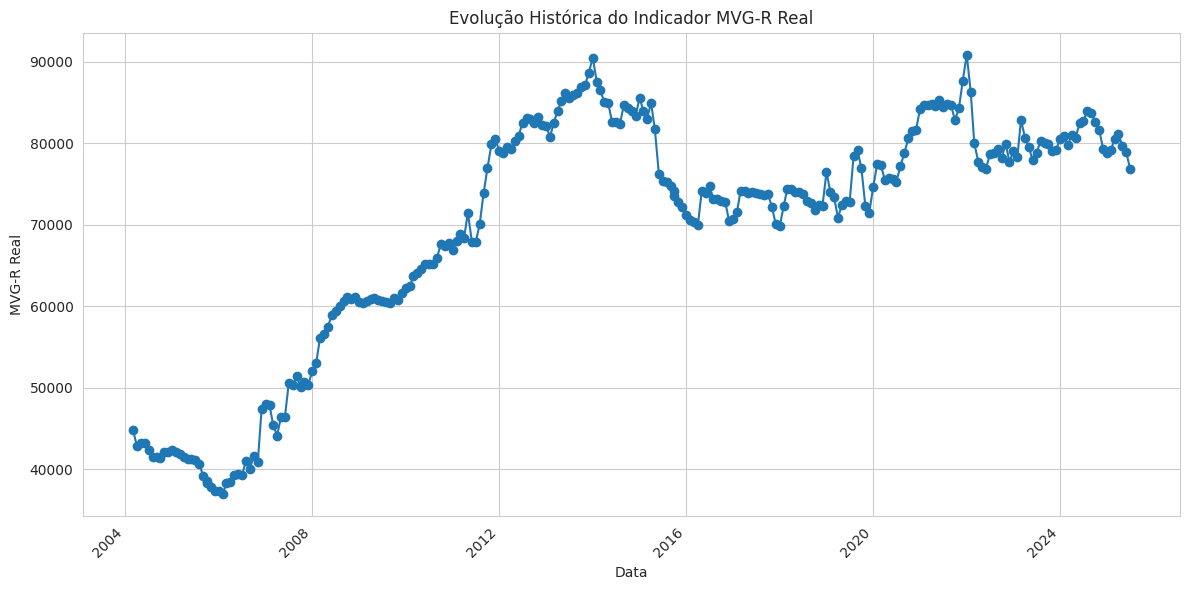

In [12]:
# Create a figure and an axes for the plot
plt.figure(figsize=(12, 6))
ax = plt.gca() # Get current axes

# Plot the time series of the MVG-R Real
df_combined['mvg_r_real'].plot(ax=ax, marker='o', linestyle='-')

# Add titles and labels
plt.title('Evolução Histórica do Indicador MVG-R Real')
plt.xlabel('Data')
plt.ylabel('MVG-R Real')

# Improve date formatting on the x-axis
plt.xticks(rotation=45)
plt.tight_layout() # Adjust layout to prevent labels overlapping

# Display the plot
plt.show()

## Salvar dados do mvg-r real em json

### Subtask:
Gerar um arquivo JSON com os dados consolidados do indicador MVG-R Real.


**Reasoning**:
Generate a JSON file containing the real MVG-R data from the df_combined DataFrame.



In [14]:
import json

# Create an empty list to store the data points for the JSON output
data_list_mvg_r_real = []

# Iterate through the df_combined DataFrame
for index, row in df_combined.iterrows():
    # Check if the 'mvg_r_real' value is not NaN before appending
    if pd.notna(row['mvg_r_real']):
        # Append a dictionary to data_list_mvg_r_real with 'date' and 'value'
        data_list_mvg_r_real.append({
            "date": index.strftime('%Y-%m-%d'),  # Format date as YYYY-MM-DD
            "rate": float(row['mvg_r_real'])  # Convert to standard Python float
        })

# Create the main dictionary structure for the JSON output
json_output_mvg_r_real = {
    "indicatorName": "MVG-R Real (descontado do IPCA)",  # Set the indicator name
    "data": data_list_mvg_r_real  # Include the list of data points
}

# Define the output file path
output_file_path_real = 'mvgr-real.json'

# Save the dictionary to a JSON file with indentation for readability
with open(output_file_path_real, 'w') as f:
    json.dump(json_output_mvg_r_real, f, indent=4)

print(f"Dados do MVG-R Real formatados e salvos em '{output_file_path_real}'")

Dados do MVG-R Real formatados e salvos em 'mvgr-real.json'
